In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier

In [3]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [4]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [5]:
import shap

# 1. Load data

In [6]:
# data set from https://www.kaggle.com/datasets/blastchar/telco-customer-churn/code?resource=download

In [7]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [8]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 2. check data quarity

In [9]:
# check data type

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
# check na

In [12]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
# create lsit of id, target, features

In [14]:
id = ['customerID']
target = ['Churn']
feature_cat = ['SeniorCitizen','gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
               'StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','TotalCharges']
feature_num = ['tenure','MonthlyCharges']

In [15]:
# plot target distribuition

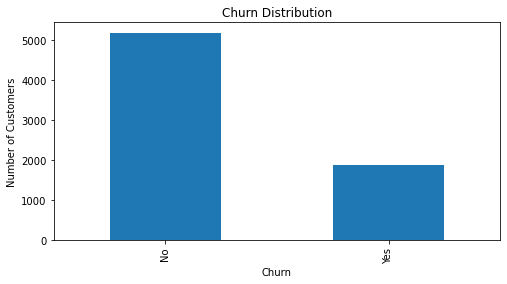

In [16]:
df['Churn'].value_counts().plot(kind='bar', figsize=(8, 4))
plt.title('Churn' + ' Distribution')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()


In [17]:
# plot feature (cat) distribution

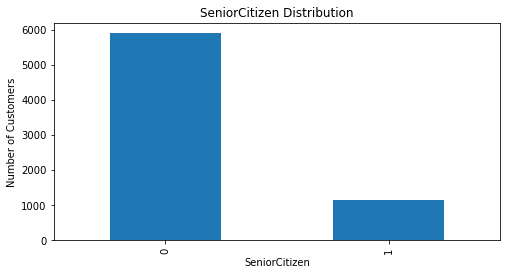

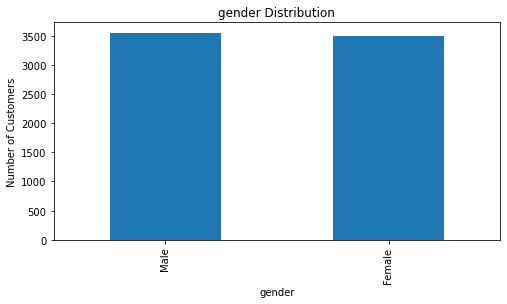

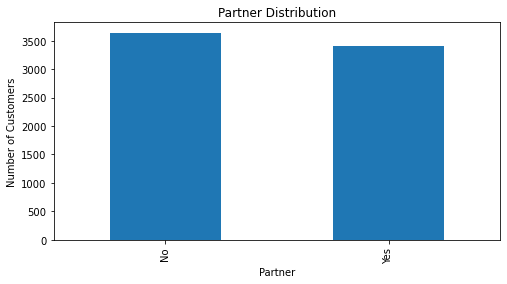

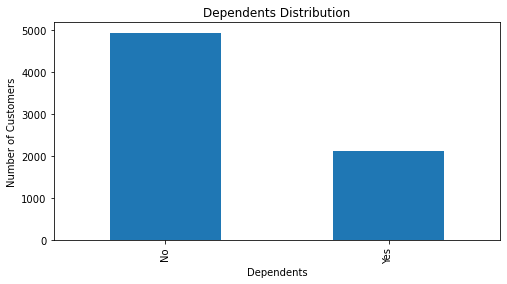

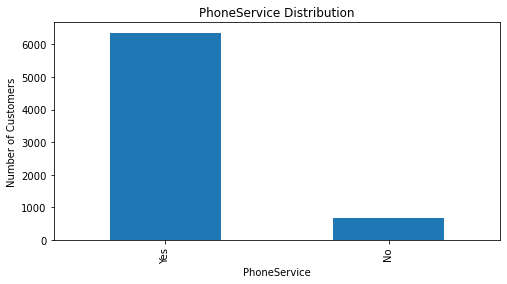

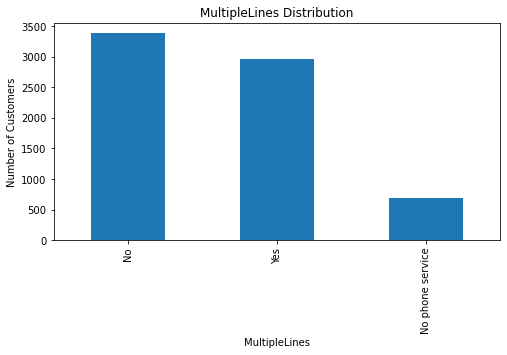

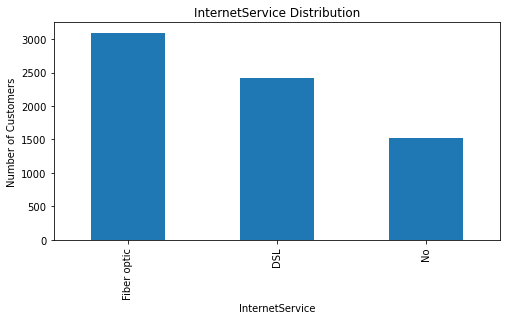

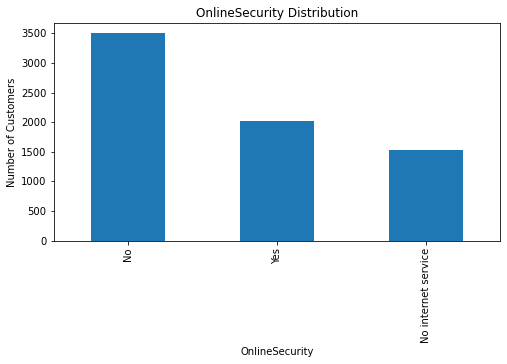

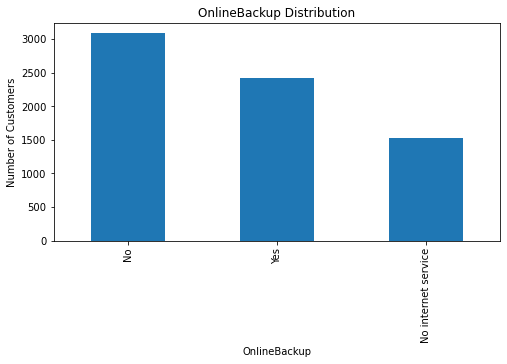

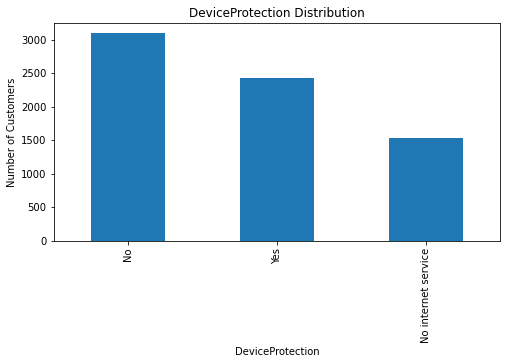

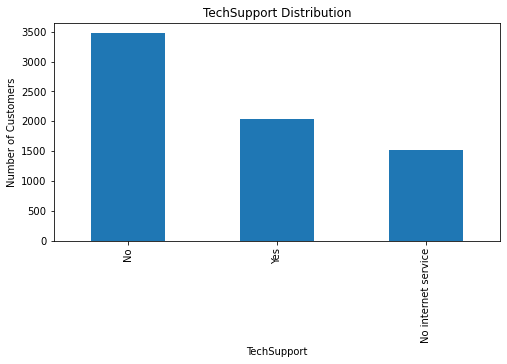

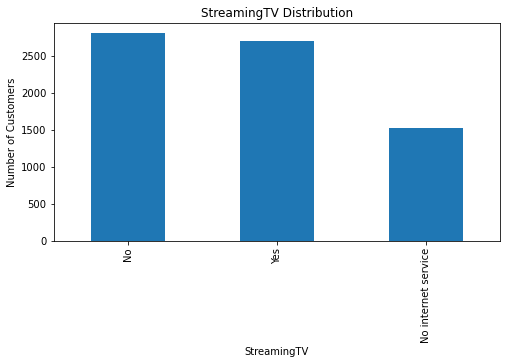

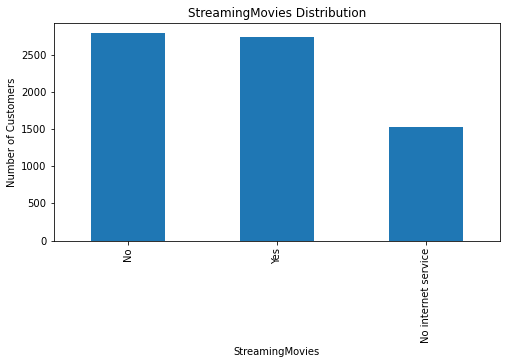

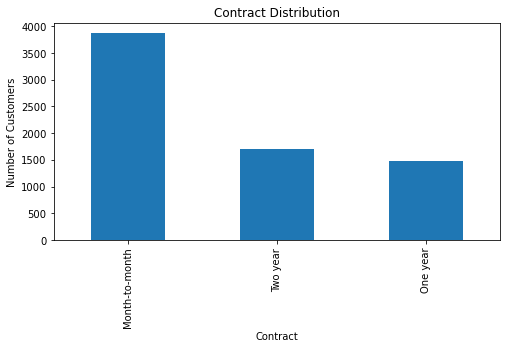

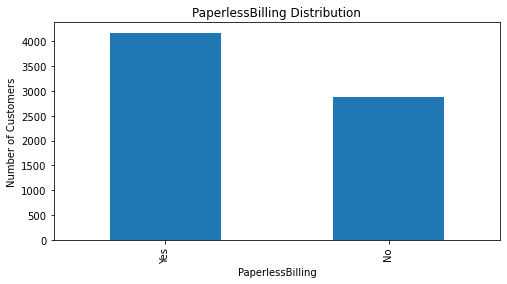

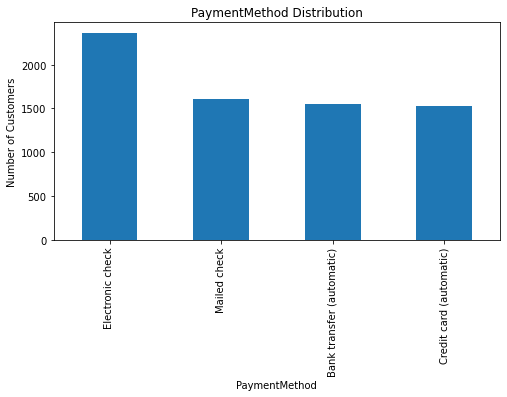

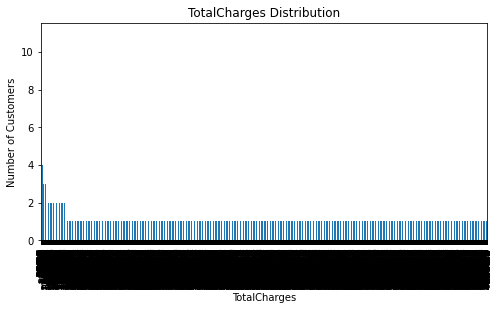

In [18]:
for col in feature_cat:
    df[col].value_counts().plot(kind='bar', figsize=(8, 4))
    plt.title(col + ' Distribution')
    plt.xlabel(col)
    plt.ylabel('Number of Customers')
    plt.show()


In [19]:
# we can see some problem on TotalCharges

In [20]:
# plot feature (num) distribution

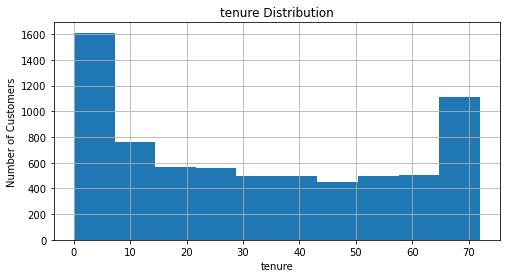

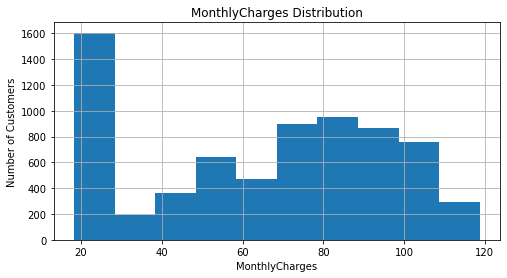

In [21]:
for col in feature_num:
    df[col].hist(figsize=(8, 4))
    plt.title(col + ' Distribution')
    plt.xlabel(col)
    plt.ylabel('Number of Customers')
    plt.show()

# 3. Data transformation

In [22]:
# target

In [23]:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [24]:
# features (TotalCharges)

In [25]:
df['TotalCharges'].str.isspace().sum()

11

In [26]:
df[df['TotalCharges'].str.isspace()].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0


In [27]:
rows_with_spaces = df[df['TotalCharges'].str.isspace()]

In [28]:
df = df.drop(rows_with_spaces.index)

In [29]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [30]:
# others features

In [31]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)

df['Partner'] = df['Partner'].apply(lambda x: 1 if x == 'Yes' else 0)

df['Dependents'] = df['Dependents'].apply(lambda x: 1 if x == 'Yes' else 0)

df['PhoneService'] = df['PhoneService'].apply(lambda x: 1 if x == 'Yes' else 0)

df['PhoneService'] = df['MultipleLines'].apply(lambda x: 1 if x == 'No phone service' else 0)

df['MultipleLines'] = df['MultipleLines'].apply(lambda x: 1 if x == 'Yes' else 0)

df['InternetService'] = df['InternetService'].apply(lambda x: 2 if x == 'Fiber optic' else 1 if x == 'DSL' else 0)

# df['OnlineSecurity_no_internet'] = df['OnlineSecurity'].apply(lambda x: 1 if x == 'No internet service' else 0)
df['OnlineSecurity'] = df['OnlineSecurity'].apply(lambda x: 1 if x == 'Yes' else 0)

# df['OnlineBackup_no_internet'] = df['OnlineBackup'].apply(lambda x: 1 if x == 'No internet service' else 0)
df['OnlineBackup'] = df['OnlineBackup'].apply(lambda x: 1 if x == 'Yes' else 0)

# df['DeviceProtection_no_internet'] = df['DeviceProtection'].apply(lambda x: 1 if x == 'No internet service' else 0)
df['DeviceProtection'] = df['DeviceProtection'].apply(lambda x: 1 if x == 'Yes' else 0)

# df['TechSupport_no_internet'] = df['TechSupport'].apply(lambda x: 1 if x == 'No internet service' else 0)
df['TechSupport'] = df['TechSupport'].apply(lambda x: 1 if x == 'Yes' else 0)

# df['StreamingTV_no_internet'] = df['StreamingTV'].apply(lambda x: 1 if x == 'No internet service' else 0)
df['StreamingTV'] = df['StreamingTV'].apply(lambda x: 1 if x == 'Yes' else 0)

# df['StreamingMovies_no_internet'] = df['StreamingMovies'].apply(lambda x: 1 if x == 'No internet service' else 0)
df['StreamingMovies'] = df['StreamingMovies'].apply(lambda x: 1 if x == 'Yes' else 0)

df['Contract'] = df['Contract'].apply(lambda x: 0 if x == 'Month-to-month' else 1 if x == 'One year' else 2)

df['PaperlessBilling'] = df['PaperlessBilling'].apply(lambda x: 1 if x == 'Yes' else 0)

In [32]:
# one-hot (PaymentMethod)
for payment_method in df['PaymentMethod'].unique():
    df['PaymentMethod_' + payment_method] = df['PaymentMethod'].apply(lambda x: 1 if x == payment_method else 0)
df = df.drop('PaymentMethod', axis=1)

In [33]:
# drop customer ID
df.drop(columns = 'customerID', inplace = True)

In [34]:
# check data again

In [35]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic)
0,0,0,1,0,1,1,0,1,0,1,...,0,0,1,29.85,29.85,0,1,0,0,0
1,1,0,0,0,34,0,0,1,1,0,...,0,1,0,56.95,1889.50,0,0,1,0,0
2,1,0,0,0,2,0,0,1,1,1,...,0,0,1,53.85,108.15,1,0,1,0,0
3,1,0,0,0,45,1,0,1,1,0,...,0,1,0,42.30,1840.75,0,0,0,1,0
4,0,0,0,0,2,0,0,2,0,0,...,0,0,1,70.70,151.65,1,1,0,0,0


In [36]:
df.shape

(7032, 23)

# 3. EDA

In [37]:
# calculate correlation matrix
corr = df.corr()

<AxesSubplot:>

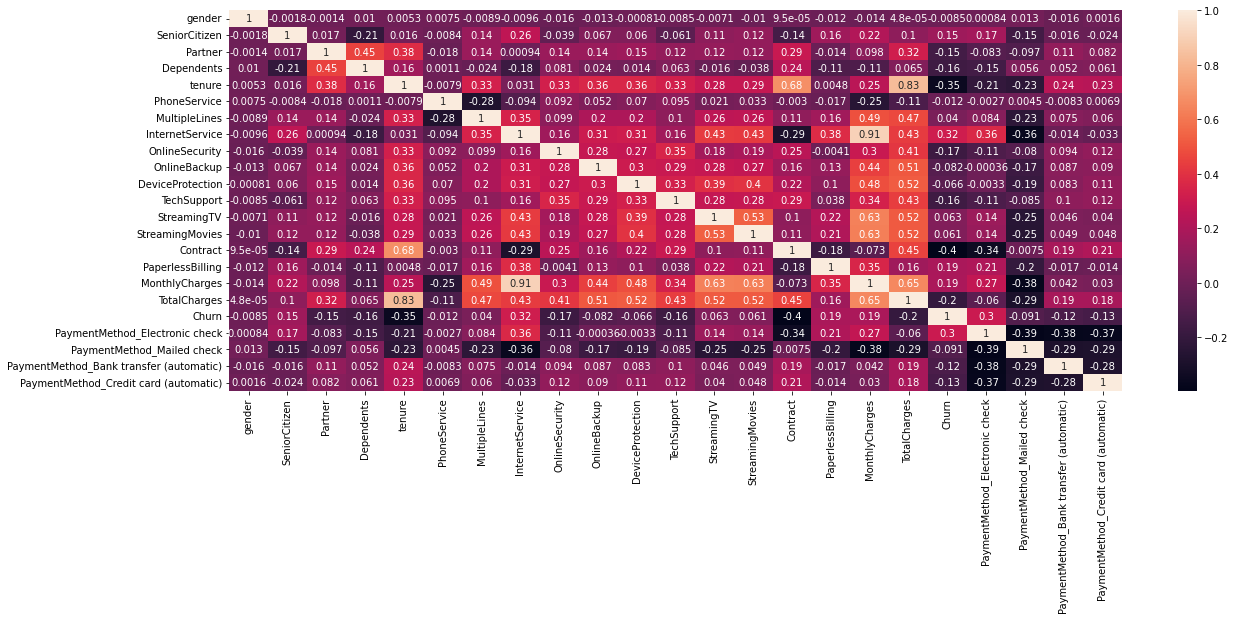

In [38]:
# create figure and axes
fig, ax = plt.subplots(figsize=(20, 7))
# plot correlation matrix
sns.heatmap(corr, annot=True, ax=ax)

In [39]:
corr_churn_table = corr['Churn'].sort_values(ascending=False)

In [40]:
corr_churn_table

Churn                                      1.000000
InternetService                            0.316350
PaymentMethod_Electronic check             0.301455
MonthlyCharges                             0.192858
PaperlessBilling                           0.191454
SeniorCitizen                              0.150541
StreamingTV                                0.063254
StreamingMovies                            0.060860
MultipleLines                              0.040033
gender                                    -0.008545
PhoneService                              -0.011691
DeviceProtection                          -0.066193
OnlineBackup                              -0.082307
PaymentMethod_Mailed check                -0.090773
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Credit card (automatic)     -0.134687
Partner                                   -0.149982
Dependents                                -0.163128
TechSupport                               -0.164716
OnlineSecuri

In [41]:
corr_churn_abs_table = corr['Churn'].abs().sort_values(ascending=False)

In [42]:
corr_churn_abs_table

Churn                                      1.000000
Contract                                   0.396150
tenure                                     0.354049
InternetService                            0.316350
PaymentMethod_Electronic check             0.301455
TotalCharges                               0.199484
MonthlyCharges                             0.192858
PaperlessBilling                           0.191454
OnlineSecurity                             0.171270
TechSupport                                0.164716
Dependents                                 0.163128
SeniorCitizen                              0.150541
Partner                                    0.149982
PaymentMethod_Credit card (automatic)      0.134687
PaymentMethod_Bank transfer (automatic)    0.118136
PaymentMethod_Mailed check                 0.090773
OnlineBackup                               0.082307
DeviceProtection                           0.066193
StreamingTV                                0.063254
StreamingMov

# 4. Model

In [43]:
# only class 0
# only class 1

# normalized > smote > rf (random search)
# normalized > smote > lgbm (random search)
# normalized > smote > xgb (random search)

# normalized > rus > rf (random search)
# normalized > rus > lgbm (random search)
# normalized > rus > xgb (random search)

In [44]:
# Step 1: Train/Test/Validation Split

In [45]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

In [46]:
X_train = train_df.drop(columns=['Churn'])
y_train = train_df['Churn']
X_val = val_df.drop(columns=['Churn'])
y_val = val_df['Churn']
X_test = test_df.drop(columns=['Churn'])
y_test = test_df['Churn']

In [47]:
print(X_train.shape)
print(y_train.shape)

print(X_val.shape)
print(y_val.shape)
 
print(X_test.shape)
print(y_test.shape)

(4500, 22)
(4500,)
(1125, 22)
(1125,)
(1407, 22)
(1407,)


In [48]:
# Step 2: Normalize Min-Max Scaling

In [49]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [50]:
# Step 3.1: predicts only 1

In [51]:
dummy_all_churn = DummyClassifier(strategy='constant', constant=1)
dummy_all_churn.fit(X_train_scaled, y_train)

DummyClassifier(constant=1, strategy='constant')

In [52]:
# Step 3.2: predicts only 0

In [53]:
dummy_all_not_churn = DummyClassifier(strategy='constant', constant=0)
dummy_all_not_churn.fit(X_train_scaled, y_train)

DummyClassifier(constant=0, strategy='constant')

In [54]:
# step 3.3: Smote + RF

In [55]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [56]:
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}
rf = RandomForestClassifier(random_state=42)
rf_smote_random_search = RandomizedSearchCV(rf, param_distributions=rf_params, n_iter=10, cv=3, random_state=42, scoring='recall')
rf_smote_random_search.fit(X_train_smote, y_train_smote)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='recall')

In [57]:
rf_smote_random_search.best_score_

0.8609635273979177

In [58]:
rf_smote = rf_smote_random_search.best_estimator_

In [59]:
# step 3.4: Smote + LGBM

In [60]:
lgbm_params = {
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [-1, 10, 20, 30],
    'min_child_samples': [20, 50, 100],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}
lgbm = LGBMClassifier(random_state=42)
lgbm_smote_random_search = RandomizedSearchCV(lgbm, param_distributions=lgbm_params, n_iter=10, cv=3, random_state=42, scoring='recall')
lgbm_smote_random_search.fit(X_train_smote, y_train_smote)

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(random_state=42),
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [-1, 10, 20, 30],
                                        'min_child_samples': [20, 50, 100],
                                        'n_estimators': [100, 200, 300],
                                        'num_leaves': [31, 50, 100],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='recall')

In [61]:
lgbm_smote_random_search.best_score_

0.8222699024110124

In [62]:
lgbm_smote = lgbm_smote_random_search.best_estimator_

In [63]:
# step 3.5: Smote + XGB

In [64]:
xgb_params = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}
xgb = XGBClassifier(random_state=42)
xgb_smote_random_search = RandomizedSearchCV(xgb, param_distributions=xgb_params, n_iter=10, cv=3, random_state=42, scoring='recall')
xgb_smote_random_search.fit(X_train_smote, y_train_smote)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                         

In [65]:
xgb_smote_random_search.best_score_

0.8561178088247473

In [66]:
xgb_smote = xgb_smote_random_search.best_estimator_

In [67]:
# step 3.6: RUS + RF

In [68]:
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train_scaled, y_train)

In [69]:
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}
rf = RandomForestClassifier(random_state=42)
rf_rus_random_search = RandomizedSearchCV(rf, param_distributions=rf_params, n_iter=10, cv=3, random_state=42, scoring='recall')
rf_rus_random_search.fit(X_train_rus, y_train_rus)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='recall')

In [70]:
rf_rus_random_search.best_score_

0.7978325717588785

In [71]:
rf_rus = rf_rus_random_search.best_estimator_

In [72]:
# step 3.7: RUS + LGBM

In [73]:
lgbm_params = {
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [-1, 10, 20, 30],
    'min_child_samples': [20, 50, 100],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}
lgbm_rus = LGBMClassifier(random_state=42)
lgbm_rus_random_search = RandomizedSearchCV(lgbm_rus, param_distributions=lgbm_params, n_iter=10, cv=3, random_state=42, scoring='recall')
lgbm_rus_random_search.fit(X_train_rus, y_train_rus)

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(random_state=42),
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [-1, 10, 20, 30],
                                        'min_child_samples': [20, 50, 100],
                                        'n_estimators': [100, 200, 300],
                                        'num_leaves': [31, 50, 100],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='recall')

In [74]:
lgbm_rus_random_search.best_score_

0.7877422376365454

In [75]:
lgbm_rus = lgbm_rus_random_search.best_estimator_

In [76]:
# step 3.8: RUS + XGB

In [77]:
xgb_params = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}
xgb_rus = XGBClassifier(random_state=42)
xgb_rus_random_search = RandomizedSearchCV(xgb_rus, param_distributions=xgb_params, n_iter=10, cv=3, random_state=42, scoring='recall')
xgb_rus_random_search.fit(X_train_rus, y_train_rus)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                         

In [78]:
xgb_rus_random_search.best_score_

0.8305401904569024

In [79]:
xgb_rus = xgb_rus_random_search.best_estimator_

# 6. Result (precision/recall/AUC-ROC)

In [80]:
models = {
    'Dummy Model (All Churn)': dummy_all_churn,
    'Dummy Model (All Not Churn)': dummy_all_not_churn,
    'Random Forest (SMOTE)': rf_smote,
    'LightGBM (SMOTE)': lgbm_smote,
    'XGBoost (SMOTE)': xgb_smote,
    'Random Forest (RUS)': rf_rus,
    'LightGBM (RUS)': lgbm_rus,
    'XGBoost (RUS)': xgb_rus
}

In [81]:
X_test_scaled

array([[1., 1., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [82]:
y_test

2481    0
6784    0
6125    1
3052    0
4099    0
       ..
1733    0
5250    0
5465    0
5851    0
3984    0
Name: Churn, Length: 1407, dtype: int64

In [83]:
summary_metrics = pd.DataFrame(columns=['Model', 'Observation', 'TP', 'TN', 'FP', 'FN', 'Precision', 'Recall', 'AUCROC'])

In [84]:
for model_name, model in models.items():
    
    # Predict on test data
    y_pred = model.predict(X_test_scaled)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate TP, TN, FP, FN
    tp = cm[1, 1]
    tn = cm[0, 0]
    fp = cm[0, 1]
    fn = cm[1, 0]
    
    # Calculate recall and precision
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    
    # Calculate AUC-ROC
    auc_roc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
    
    # Append metrics to the summary DataFrame
    summary_metrics = summary_metrics.append({
        'Model': model_name,
        'Observation': len(y_test),
        'TP': tp,
        'TN': tn,
        'FP': fp,
        'FN': fn,
        'Precision': precision,        
        'Recall': recall,
        'AUCROC': auc_roc
        }, ignore_index=True)

invalid value encountered in longlong_scalars


In [85]:
summary_metrics

,Model,Observation,TP,TN,FP,FN,Precision,Recall,AUCROC
0,Dummy Model (All Churn),1407,374,0,1033,0,0.265814,1.000000,0.500000
1,Dummy Model (All Not Churn),1407,0,1033,0,374,NaN,0.000000,0.500000
2,Random Forest (SMOTE),1407,252,812,221,122,0.532770,0.673797,0.824113
3,LightGBM (SMOTE),1407,256,808,225,118,0.532225,0.684492,0.819451
4,XGBoost (SMOTE),1407,289,742,291,85,0.498276,0.772727,0.828354
5,Random Forest (RUS),1407,294,729,304,80,0.491639,0.786096,0.828529
6,LightGBM (RUS),1407,295,726,307,79,0.490033,0.788770,0.828037
7,XGBoost (RUS),1407,306,688,345,68,0.470046,0.818182,0.826978


# 7. Tuning threshold using cost-sensitive

In [86]:
# Assume
# Cost of promotion = 100
# Cost of losing customer = 500 (5 times)

In [87]:
# ref from https://github.com/stephenblount/Churn_Classification/blob/main/Final_Analysis/Churn_Analysis_Final.ipynb

In [88]:
cost_promotion = 100
cost_loss = 500
savings_per_customer = 500

In [89]:
thresholds = np.linspace(0, 1, 101)  # 101 thresholds from 0 to 1

In [90]:
best_thresholds = {}
gains_val = {}
gains_test = {}

In [91]:
for model_name, model in models.items():

    model_gains_val = []
    model_gains_test = []

    # find best threshold from val set
    y_pred_proba = model.predict_proba(X_val_scaled)[:, 1]
    if model_name == 'Dummy Model (All Churn)':
        y_pred_proba = y_pred_proba + 0.1
    elif model_name == 'Dummy Model (All Not Churn)':
        y_pred_proba = y_pred_proba - 0.1

    model_gains = []
    for threshold in thresholds:
        y_pred = (y_pred_proba > threshold).astype(int)
        cm = confusion_matrix(y_val, y_pred)
        costs = (cm[0, 1] * cost_promotion) + (cm[1, 0] * cost_loss)
        savings = cm[1, 1] * savings_per_customer
        gain = savings - costs
        model_gains.append(gain)

    best_threshold_idx = np.argmax(model_gains)
    best_threshold = thresholds[best_threshold_idx]
    
    best_thresholds[model_name] = (best_threshold, max(model_gains))
    gains_val[model_name] = model_gains
    
    # use best threshold from val set in test set
    y_test_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    if model_name == 'Dummy Model (All Churn)':
        y_test_pred_proba = y_test_pred_proba + 0.1
    elif model_name == 'Dummy Model (All Not Churn)':
        y_test_pred_proba = y_test_pred_proba - 0.1 

    y_test_pred = (y_test_pred_proba > best_threshold).astype(int)
    cm_test = confusion_matrix(y_test, y_test_pred)  
    costs_test = (cm_test[0, 1] * cost_promotion) + (cm_test[1, 0] * cost_loss)
    savings_test = cm_test[1, 1] * savings_per_customer   
    gain_test = savings_test - costs_test

    gains_test[model_name] = gain_test

In [92]:
best_thresholds

{'Dummy Model (All Churn)': (0.0, 69300),
 'Dummy Model (All Not Churn)': (0.0, -151500),
 'Random Forest (SMOTE)': (0.18, 95500),
 'LightGBM (SMOTE)': (0.25, 95900),
 'XGBoost (SMOTE)': (0.19, 97900),
 'Random Forest (RUS)': (0.28, 96500),
 'LightGBM (RUS)': (0.25, 94700),
 'XGBoost (RUS)': (0.31, 96800)}

In [93]:
gains_test

{'Dummy Model (All Churn)': 83700,
 'Dummy Model (All Not Churn)': -187000,
 'Random Forest (SMOTE)': 108400,
 'LightGBM (SMOTE)': 102400,
 'XGBoost (SMOTE)': 108000,
 'Random Forest (RUS)': 109400,
 'LightGBM (RUS)': 110700,
 'XGBoost (RUS)': 108200}

In [94]:
summary_thresholds = pd.DataFrame(columns=['Model', 'Best Threshold', 'Validation Gain', 'Test Gain'])

In [95]:
for model_name, model_gains_val in gains_val.items():
    best_threshold, _ = best_thresholds[model_name]

    summary_thresholds = summary_thresholds.append({
        'Model': model_name,
        'Best Threshold': best_threshold,
        'Validation Gain': max(model_gains_val),
        'Test Gain': gains_test[model_name]
    }, ignore_index=True)

In [96]:
summary_thresholds

,Model,Best Threshold,Validation Gain,Test Gain
0,Dummy Model (All Churn),0.00,69300,83700
1,Dummy Model (All Not Churn),0.00,-151500,-187000
2,Random Forest (SMOTE),0.18,95500,108400
3,LightGBM (SMOTE),0.25,95900,102400
4,XGBoost (SMOTE),0.19,97900,108000
5,Random Forest (RUS),0.28,96500,109400
6,LightGBM (RUS),0.25,94700,110700
7,XGBoost (RUS),0.31,96800,108200


# 8. Result (threshold/cost)

In [97]:
summary_df = pd.merge(summary_metrics, summary_thresholds, on="Model", how="left")

In [98]:
summary_df

,Model,Observation,TP,TN,FP,FN,Precision,Recall,AUCROC,Best Threshold,Validation Gain,Test Gain
0,Dummy Model (All Churn),1407,374,0,1033,0,0.265814,1.000000,0.500000,0.00,69300,83700
1,Dummy Model (All Not Churn),1407,0,1033,0,374,NaN,0.000000,0.500000,0.00,-151500,-187000
2,Random Forest (SMOTE),1407,252,812,221,122,0.532770,0.673797,0.824113,0.18,95500,108400
3,LightGBM (SMOTE),1407,256,808,225,118,0.532225,0.684492,0.819451,0.25,95900,102400
4,XGBoost (SMOTE),1407,289,742,291,85,0.498276,0.772727,0.828354,0.19,97900,108000
5,Random Forest (RUS),1407,294,729,304,80,0.491639,0.786096,0.828529,0.28,96500,109400
6,LightGBM (RUS),1407,295,726,307,79,0.490033,0.788770,0.828037,0.25,94700,110700
7,XGBoost (RUS),1407,306,688,345,68,0.470046,0.818182,0.826978,0.31,96800,108200


In [99]:
y_test.shape

(1407,)

In [100]:
# lgbm_rus is the best model in term of gains

# 9. SHAP

In [101]:
column_names = X_train.columns.tolist()

In [102]:
column_names

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)']

In [103]:
explainer = shap.Explainer(lgbm_rus)
shap_values = explainer.shap_values(X_train_rus)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [104]:
explanation = shap.Explanation(values=shap_values[0], data=X_train_rus, feature_names=column_names)

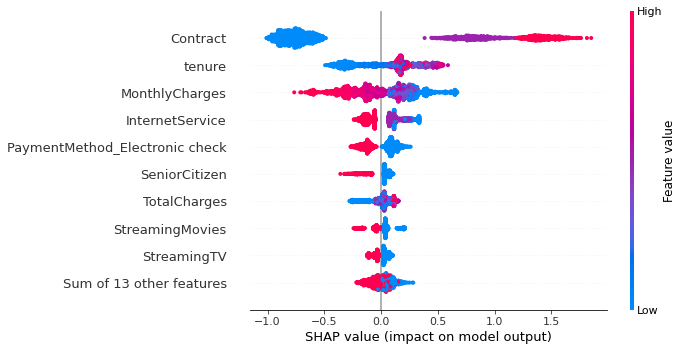

In [105]:
shap.plots.beeswarm(explanation)
plt.show()

In [106]:
# top 5 impacted is 1. contract 2. tenue 3. monthlycharges 4. internetservince 5. Payment method (electronic check)